<center><h1>Honda Word Cloud Generator</h1></center>

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from xlwings import Range, Workbook, Plot
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

# Exclude words that are almost always used in the contention text and are not value-added
STOPWORDS.add('assembly')
STOPWORDS.add('assy')
STOPWORDS.add('customer')
STOPWORDS.add('client')
STOPWORDS.add('correct')
STOPWORDS.add('cust')
STOPWORDS.add('check')
STOPWORDS.add('bad')
STOPWORDS.add('car')
STOPWORDS.add('confirm')
STOPWORDS.add('confirmed')
STOPWORDS.add('diagnose')
STOPWORDS.add('sop')
STOPWORDS.add('replace')
STOPWORDS.add('replaced')
STOPWORDS.add('repl')
STOPWORDS.add('state')
STOPWORDS.add('states')
STOPWORDS.add('report')
STOPWORDS.add('find')
STOPWORDS.add('perform')
STOPWORDS.add('performed')
STOPWORDS.add('checked')
STOPWORDS.add('found')
STOPWORDS.add('advise')
STOPWORDS.add('advised')
STOPWORDS.add('inspect')
STOPWORDS.add('inspected')
STOPWORDS.add('inspection')
STOPWORDS.add('install')
STOPWORDS.add('tech')
STOPWORDS.add('technician')
STOPWORDS.add('new')
STOPWORDS.add('repair')
STOPWORDS.add('test')
STOPWORDS.add('please')
STOPWORDS.add('request')
STOPWORDS.add('per')
STOPWORDS.add('c')
STOPWORDS.add('s')
STOPWORDS.add('vehicle')
STOPWORDS.add('veh')
STOPWORDS.add('verify')

wb = Workbook.active()

#### For small data set, read from the active worksheet:

In [24]:
df = Range('A1').table.options(pd.DataFrame).value

#### Otherwise, read the file from pandas:

In [ ]:
df = pd.read_excel(r'D:\some_file.xlsx', sheetname='Claims')

D:\Miniconda3\envs\jupyter\lib\site-packages\PIL\ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


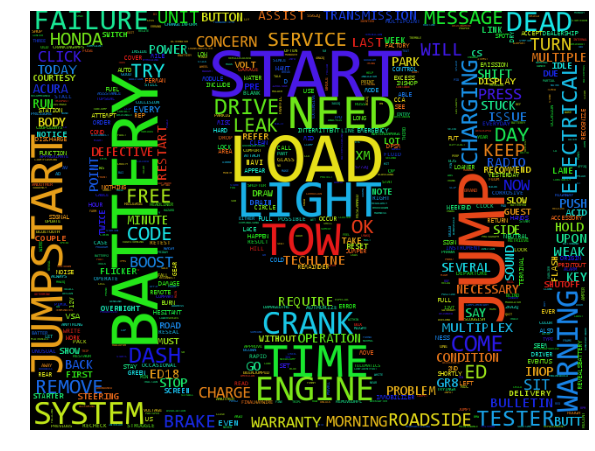

In [25]:
text = ''
for row in df.CUST_CONTENTION_TEXT_ENRICHED.values:
    text = text + str(row) + ' '

# read the mask image
image_mask = imread(r'D:\jupyter\wordcloud\honda_logo.png')

wc = WordCloud(max_words=2000, mask=image_mask, background_color='black',
               stopwords=STOPWORDS, font_path=r'C:\Windows\Fonts\consola.ttf')
# generate word cloud
wc.generate(text)

# store to file
#wc.to_file(r'D:\temp\Acura_WordCloud.png')

# show
fig = plt.figure()
fig.set_size_inches(10, 10)
plt.imshow(wc)
plt.axis("off")
#fig.savefig(r'D:\temp\Acura_WordCloud.png', dpi=300, pad_inches=0, bbox_inches='tight')
plot = Plot(fig)
plot.show('Plot1', width=800, height=700)

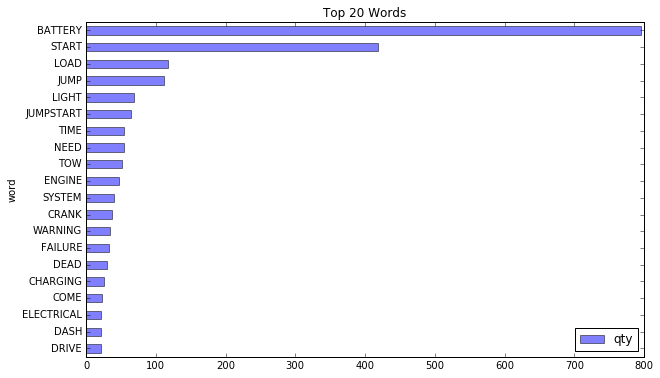

In [26]:
word = []
count = []

for item in wc.process_text(text):
    w, c = item
    word.append(w)
    count.append(c)
    
word_freq = pd.DataFrame(data={'word':word, 'qty':count})

top_x = 20
word_freq.sort_values(by='qty', ascending=False)[:top_x].set_index('word').sort_values(by='qty').plot.barh(alpha=0.5)
plt.title("Top " +str(top_x) + " Words")
fig2 = plt.gcf()
fig2.set_size_inches(10, 6)
plot = Plot(fig2)
plot.show('Plot2', left=900, width=700, height=500)